In [137]:
library("rjson")
library(igraph)
library(data.table)
#

In [138]:
gData<-fread(file="san_francisco-censustracts-2017-4-All-MonthlyAggregate.csv",data.table = TRUE)

In [139]:
jsonFile = read.table("processed.csv",sep="|",quote="")

In [140]:
head(jsonFile)

V1,V2,V3,V4
1,"Sargent Creek, San Ardo",-120.7887,36.07163
2,"400 Northumberland Avenue, Redwood Oaks, Redwood City",-122.2194,37.46958
3,"18300 Sutter Boulevard, Morgan Hill",-121.6602,37.15048
4,"2700 Stoughton Way, Sheffield, Sacramento",-121.3428,38.57307
5,"3200 Huntsman Drive, Rosemont Park, Sacramento",-121.3617,38.55443
6,"100 Carlsbad Circle, Vacaville",-121.9484,38.36665


In [141]:
head(gData)

sourceid,dstid,month,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
434,906,10,188.09,116.06,168.73,1.54
1311,3,10,1300.10,377.45,1261.17,1.26
1736,2,10,805.12,344.87,744.22,1.47
560,2375,10,1627.73,533.35,1552.00,1.35
1628,2367,10,1228.89,452.52,1167.50,1.36
1938,1952,12,596.69,327.27,530.23,1.60


In [142]:
df2<-gData[,c('sourceid','dstid','month','mean_travel_time')]

In [143]:
newdf<-df2[which(df2$'month'==12),c('sourceid','dstid','mean_travel_time')]

In [144]:
colnames(newdf)[colnames(newdf)=="mean_travel_time"] <- "weight"

In [145]:
head(newdf)

sourceid,dstid,weight
1938,1952,596.69
1747,629,1454.81
1872,1919,1227.01
1871,1929,1005.54
81,2319,474.53
1873,1909,1164.51


In [146]:
gg<-graph.data.frame(newdf,directed=FALSE)

In [147]:
vcount(gg)

[1] 1887

In [148]:
ecount(gg)

[1] 538998

In [149]:
is_weighted(gg)

[1] TRUE

In [150]:
nrow(df2)

[1] 1605957

In [151]:
gg.components <- clusters(gg)
ix <- which.max(gg.components$csize)
gg.giant <- induced.subgraph(gg, which(gg.components$membership == ix))

In [152]:
gg.components$csize

[1] 1880    5    2

In [153]:
g=simplify(gg.giant, edge.attr.comb=list(weight="mean"))

In [154]:
g.components <- clusters(g)
ix <- which.max(g.components$csize)
g.giant <- induced.subgraph(g, which(g.components$membership == ix))

In [155]:
ecount(gg.giant)

[1] 538984

In [156]:
vcount(gg)

[1] 1887

In [157]:
#Part2
m<-minimum.spanning.tree(g)

In [158]:
dfs(m, root=1, "out",  TRUE, TRUE, TRUE, TRUE)

$root
[1] 0

$neimode
[1] "out"

$order
+ 1880/1880 vertices, named, from bf01861:
   [1] 1938 1241 2514 1388 2488 1873 251  309  565  157  1407 38   1409 3   
  [15] 567  1396 2527 2238 1965 1966 88   1399 2239 2701 1444 344  2108 2109
  [29] 2564 1154 1155 2125 2107 1972 1429 1978 1426 2390 1971 215  1440 240 
  [43] 1441 1979 1813 1809 172  2243 1808 2341 2529 1807 1806 365  1992 938 
  [57] 2242 1432 1804 1967 1439 239  1431 1989 2528 1981 89   420  748  1968
  [71] 1424 2241 238  1970 268  1980 252  274  312  1805 2659 1495 1425 1969
  [85] 2335 2271 2113 2655 2662 1174 2270 2269 69   787  378  884  2507 2123
  [99] 2122 2259 2479 786  1173 1172 2111 16   2258 776  1171 2112 17   2110
 [113] 1170 2478 2563 2015 847  897  160  1161 2124 948  2562 1156 2100 158 
 [127] 2101 14   2257 1158 2103 1144 2627 784  377  1182 503  2476 2102 788 
+ ... omitted several vertices

$order.out
+ 1880/1880 vertices, named, from bf01861:
   [1] 1873 215  240  1441 1440 1971 2390 1426 1978 2341 2242

In [159]:
#for getting approximate case, browse through all edges in the graph
outfile = file("uber_edgelist.txt", "w")
new_path <- c()
sum=0
root1="1938"
count = 2
new_path[1]= root1
v<-as_ids(dfs(m, root=root1, "out",  TRUE, TRUE, TRUE, TRUE)$order)
len <- length(v)-1
for(i in 1:len){
    print(v[i])
    print(v[i+1])
    #print(edges)
    e <- get.edge.ids(g, c(v[i],v[i+1]))
    #print(e)
    
    if(e!=0){
    w <- E(g)[e]$weight
    sum=sum+w
        print(sum)
        new_path[count]=v[i+1]
        count=count+1
        }
   
    else{
        print("inside j")
        
        
        #find shortest possible path between the two edges and add
        #get.shortest.paths()
        uu<-as_ids(get.shortest.paths(g, from=toString(v[i]) , to=toString(v[i+1]))$vpath[[1]])
        currsum=0
        rr<-length(uu)-1
        for (j in 1:rr){
            print(uu[j])
            print(uu[j+1])
            e1 <- get.edge.ids(g, c(uu[j],uu[j+1]))
            print(e1)
            w <- E(g)[e1]$weight
            currsum=currsum+w
            print(currsum)
            new_path[count]=uu[j+1]
            count=count+1
        }
             sum=sum+currsum
        
        #break
    }
        
       #print(i)
    cat(v[i],'\t',v[i+1],'\t',w,'\n', file=outfile)
    
}

[1] "1938"
[1] "1241"
[1] 132.59
[1] "1241"
[1] "2514"
[1] 259.02
[1] "2514"
[1] "1388"
[1] 396.005
[1] "1388"
[1] "2488"
[1] 528.025
[1] "2488"
[1] "1873"
[1] 691.995
[1] "1873"
[1] "251"
[1] 866.805
[1] "251"
[1] "309"
[1] 988.745
[1] "309"
[1] "565"
[1] 1107.27
[1] "565"
[1] "157"
[1] 1207.68
[1] "157"
[1] "1407"
[1] 1460.38
[1] "1407"
[1] "38"
[1] 1638.2
[1] "38"
[1] "1409"
[1] 1937.175
[1] "1409"
[1] "3"
[1] 2118.46
[1] "3"
[1] "567"
[1] 2275.715
[1] "567"
[1] "1396"
[1] 2460.8
[1] "1396"
[1] "2527"
[1] 2711.555
[1] "2527"
[1] "2238"
[1] 2889.295
[1] "2238"
[1] "1965"
[1] 3186.955
[1] "1965"
[1] "1966"
[1] 3415.575
[1] "1966"
[1] "88"
[1] 3639.145
[1] "88"
[1] "1399"
[1] 3810.985
[1] "1399"
[1] "2239"
[1] 3994.035
[1] "2239"
[1] "2701"
[1] 4145.755
[1] "2701"
[1] "1444"
[1] 4290.95
[1] "1444"
[1] "344"
[1] 4547.785
[1] "344"
[1] "2108"
[1] 4793.35
[1] "2108"
[1] "2109"
[1] 4991.35
[1] "2109"
[1] "2564"
[1] 5206.35
[1] "2564"
[1] "1154"
[1] 5416.15
[1] "1154"
[1] "1155"
[1] 5536.39

In [160]:
 #add from last vertex back to root
        e <- get.edge.ids(m, c(v[i+1],root1))
    #print(e)
    
    if(e!=0){
    w <- E(m)[e]$weight
    sum=sum+w
        print(sum)
        } else if(get.edge.ids(g, c(v[i+1],root1))!=0){
        e <- get.edge.ids(g, c(v[i+1],root1))
        w <- E(g)[e]$weight
        sum=sum+w
        print(sum)
        #sum=sum+
    } else {
        print("inside j")
        
        
        #find shortest possible path between the two edges and add
        #get.shortest.paths()
        uu<-as_ids(get.shortest.paths(g, from=v[i+1] , to=root1)$vpath[[1]])
        currsum=0
        rr<-length(uu)-1
        for (j in 1:rr){
            print(uu[j])
            print(uu[j+1])
            e1 <- get.edge.ids(g, c(uu[j],uu[j+1]))
            print(e1)
            w <- E(g)[e1]$weight
            currsum=currsum+wt
            print(currsum)
        }
             sum=sum+currsum
        
        #break
    }
        cat(v[i+1],'\t',root1,'\t',w,'\n', file=outfile)

[1] 464758.3


In [161]:
#To find the denominator, we calculate the total cost of all edges in mst graph m

deno =sum(E(m)$weight)

In [162]:
rho = sum/deno

In [163]:
print(rho) # asnwer to question 9

[1] 1.663367


In [164]:
#for question 10
graphdata=read.table("uber_edgelist.txt")

In [165]:
dff <- data.frame(from=graphdata$V1, to=graphdata$V2, weight=graphdata$V3)

In [166]:
head(dff)

from,to,weight
1938,1241,132.590
1241,2514,126.430
2514,1388,136.985
1388,2488,132.020
2488,1873,163.970
1873,251,174.810


In [167]:
ug <- graph.data.frame(dff, directed=FALSE)

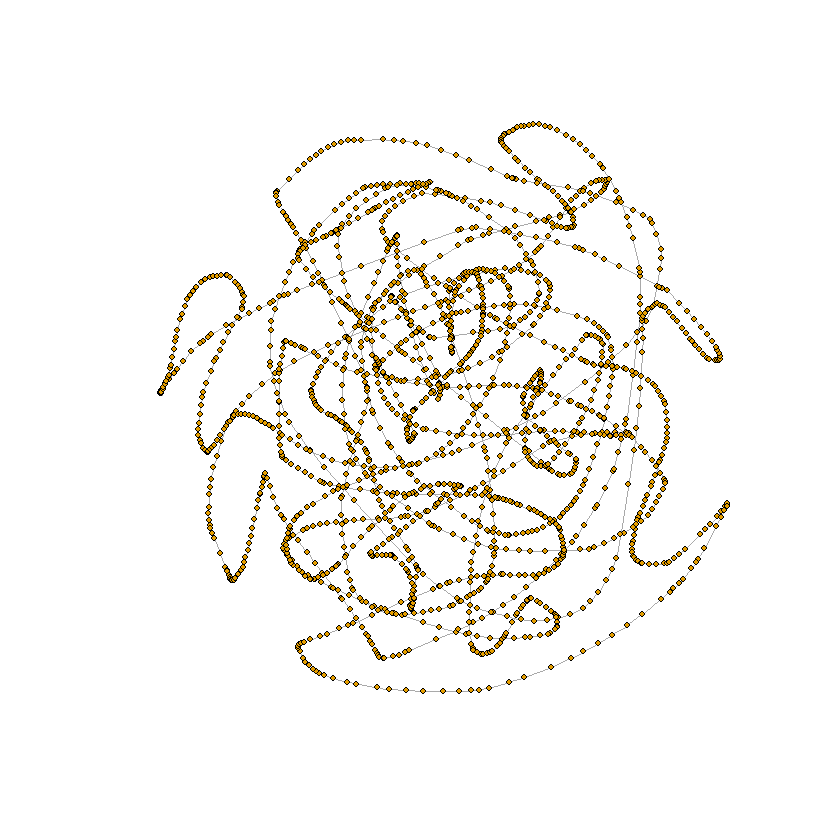

In [168]:
plot(ug,vertex.label=NA,vertex.size=2)

In [169]:
root1="1938"
v1<-as_ids(dfs(m, root=root1, "out",  TRUE, TRUE, TRUE, TRUE)$order)

In [170]:
v1

[1] "1938" "1241" "2514" "1388" "2488" "1873" "251"  "309"  "565"  "157" 
  [11] "1407" "38"   "1409" "3"    "567"  "1396" "2527" "2238" "1965" "1966"
  [21] "88"   "1399" "2239" "2701" "1444" "344"  "2108" "2109" "2564" "1154"
  [31] "1155" "2125" "2107" "1972" "1429" "1978" "1426" "2390" "1971" "215" 
  [41] "1440" "240"  "1441" "1979" "1813" "1809" "172"  "2243" "1808" "2341"
  [51] "2529" "1807" "1806" "365"  "1992" "938"  "2242" "1432" "1804" "1967"
  [61] "1439" "239"  "1431" "1989" "2528" "1981" "89"   "420"  "748"  "1968"
  [71] "1424" "2241" "238"  "1970" "268"  "1980" "252"  "274"  "312"  "1805"
  [81] "2659" "1495" "1425" "1969" "2335" "2271" "2113" "2655" "2662" "1174"
  [91] "2270" "2269" "69"   "787"  "378"  "884"  "2507" "2123" "2122" "2259"
 [101] "2479" "786"  "1173" "1172" "2111" "16"   "2258" "776"  "1171" "2112"
 [111] "17"   "2110" "1170" "2478" "2563" "2015" "847"  "897"  "160"  "1161"
 [121] "2124" "948"  "2562" "1156" "2100" "158"  "2101" "14"   "2257" "1158"
 [131] "2103" "1144" "2627" "784"  "377"  "1182" "503"  "2476" "2102" "788" 
 [141] "1159" "1160" "2640" "1157" "159"  "783"  "2506" "1153" "2106" "247" 
 [151] "1152" "846"  "2104" "2477" "896"  "2265" "2017" "1162" "204"  "2557"
 [161] "2364" "313"  "1445" "406"  "1988" "2586" "569"  "568"  "747"  "1896"
 [171] "2516" "2234" "1397" "1398" "1408" "349"  "1877" "921"  "273"  "1406"
 [181] "2515" "566"  "2233" "1385" "1870" "1876" "1387" "2653" "1386" "746" 
 [191] "876"  "187"  "700"  "1250" "1946" "977"  "1945" "2148" "1940" "549" 
 [201] "133"  "1939" "1243" "1251" "1950" "702"  "550"  "1660" "875"  "548" 
 [211] "2147" "1235" "1952" "551"  "1252" "715"  "1274" "128"  "1884" "2670"
 [221] "1892" "1890" "1284" "716"  "2594" "2362" "1269" "1893" "718"  "918" 
 [231] "1895" "1908" "418"  "822"  "2374" "1909" "719"  "1287" "1566" "195" 
 [241] "2396" "1557" "66"   "1564" "220"  "2237" "218"  "473"  "382"  "2592"
 [251] "62"   "105"  "2665" "63"   "219"  "1563" "104"  "472"  "103"  "1555"
 [261] "60"   "958"  "61"   "1556" "1551" "957"  "1106" "614"  "1550" "1484"
 [271] "392"  "1103" "1597" "605"  "888"  "864"  "108"  "1100" "1097" "447" 
 [281] "288"  "1089" "388"  "1090" "277"  "595"  "1066" "814"  "1098" "1094"
 [291] "1095" "976"  "2611" "805"  "1087" "2603" "1519" "2530" "2348" "2218"
 [301] "594"  "2217" "1462" "1064" "460"  "593"  "1538" "1062" "1541" "2219"
 [311] "2633" "2646" "1544" "1543" "2437" "1537" "810"  "1536" "2215" "99"  
 [321] "591"  "1059" "1532" "1533" "459"  "2436" "1535" "592"  "2347" "590" 
 [331] "1053" "446"  "949"  "1046" "1526" "322"  "809"  "181"  "612"  "2346"
 [341] "1527" "2597" "609"  "151"  "610"  "608"  "98"   "458"  "1559" "1577"
 [351] "1499" "1510" "2350" "1517" "422"  "30"   "1082" "939"  "599"  "1083"
 [361] "386"  "1685" "1084" "107"  "600"  "321"  "1534" "1060" "1063" "286" 
 [371] "1068" "46"   "2187" "2632" "2434" "863"  "323"  "457"  "808"  "285" 
 [381] "1080" "1504" "1498" "2213" "886"  "284"  "1030" "194"  "2212" "1512"
 [391] "464"  "1518" "1516" "2349" "2620" "1514" "1525" "1071" "812"  "462" 
 [401] "596"  "2401" "1515" "431"  "97"   "2224" "1524" "1523" "1070" "1522"
 [411] "937"  "109"  "1054" "1659" "2174" "1656" "2618" "2539" "481"  "1657"
 [421] "1658" "31"   "628"  "417"  "1047" "1655" "1651" "102"  "57"   "954" 
 [431] "479"  "2209" "100"  "1547" "627"  "2612" "2487" "2201" "1546" "1050"
 [441] "478"  "1545" "1038" "2540" "2022" "749"  "2023" "571"  "397"  "371" 
 [451] "1475" "751"  "2388" "2016" "2012" "269"  "1481" "1476" "39"   "253" 
 [461] "883"  "275"  "370"  "2013" "570"  "1465" "316"  "372"  "369"  "1996"
 [471] "2000" "398"  "2387" "296"  "762"  "841"  "1478" "2020" "2074" "2029"
 [481] "1202" "2538" "1206" "2689" "1212" "2439" "573"  "400"  "270"  "1213"
 [491] "23"   "40"   "2541" "276"  "1994" "401"  "572"  "439"  "1205" "1215"
 [501] "135"  "1991" "1993" "24"   "1214" "399"  "1203" "2588" "73"   "1995"
 [511] "1982" "7"    "25"   "2252" "753"  "2672" "1216" "136"  "1218" "752" 

In [171]:
latitude <- c()
longitude <- c()
count=1
for(i in v1){
    print(i)
    latitude[count] =jsonFile$V4[strtoi(i)]
    longitude[count] =jsonFile$V3[strtoi(i)]
    count=count+1
    
}

[1] "1938"
[1] "1241"
[1] "2514"
[1] "1388"
[1] "2488"
[1] "1873"
[1] "251"
[1] "309"
[1] "565"
[1] "157"
[1] "1407"
[1] "38"
[1] "1409"
[1] "3"
[1] "567"
[1] "1396"
[1] "2527"
[1] "2238"
[1] "1965"
[1] "1966"
[1] "88"
[1] "1399"
[1] "2239"
[1] "2701"
[1] "1444"
[1] "344"
[1] "2108"
[1] "2109"
[1] "2564"
[1] "1154"
[1] "1155"
[1] "2125"
[1] "2107"
[1] "1972"
[1] "1429"
[1] "1978"
[1] "1426"
[1] "2390"
[1] "1971"
[1] "215"
[1] "1440"
[1] "240"
[1] "1441"
[1] "1979"
[1] "1813"
[1] "1809"
[1] "172"
[1] "2243"
[1] "1808"
[1] "2341"
[1] "2529"
[1] "1807"
[1] "1806"
[1] "365"
[1] "1992"
[1] "938"
[1] "2242"
[1] "1432"
[1] "1804"
[1] "1967"
[1] "1439"
[1] "239"
[1] "1431"
[1] "1989"
[1] "2528"
[1] "1981"
[1] "89"
[1] "420"
[1] "748"
[1] "1968"
[1] "1424"
[1] "2241"
[1] "238"
[1] "1970"
[1] "268"
[1] "1980"
[1] "252"
[1] "274"
[1] "312"
[1] "1805"
[1] "2659"
[1] "1495"
[1] "1425"
[1] "1969"
[1] "2335"
[1] "2271"
[1] "2113"
[1] "2655"
[1] "2662"
[1] "1174"
[1] "2270"
[1] "2269"
[1] "69"
[1] "78

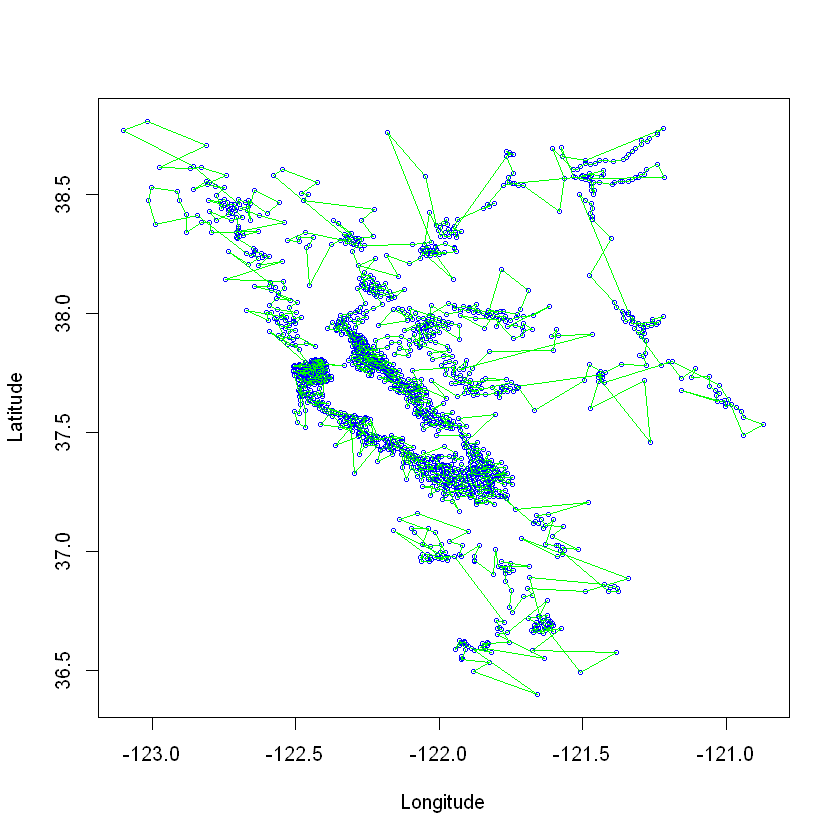

In [174]:
plot(x,y, cex=0.5, col="Blue", xlab="Longitude", ylab="Latitude")
lines(x,y, col="Green")

In [175]:
is.weighted(g)

[1] TRUE

In [176]:
library(ggmap)

In [132]:
png(filename="Q10_7.png", width = 800, height = 800)
plot(x,y, cex=0.5, col="Blue", xlab="Longitude", ylab="Latitude")
lines(x,y, col="Green")
dev.off()

png 
  2

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=37.709992,-122.077918&zoom=10&size=640x640&scale=2&maptype=roadmap&language=en-EN&sensor=false
Warning message:
"Removed 838 rows containing missing values (geom_point)."

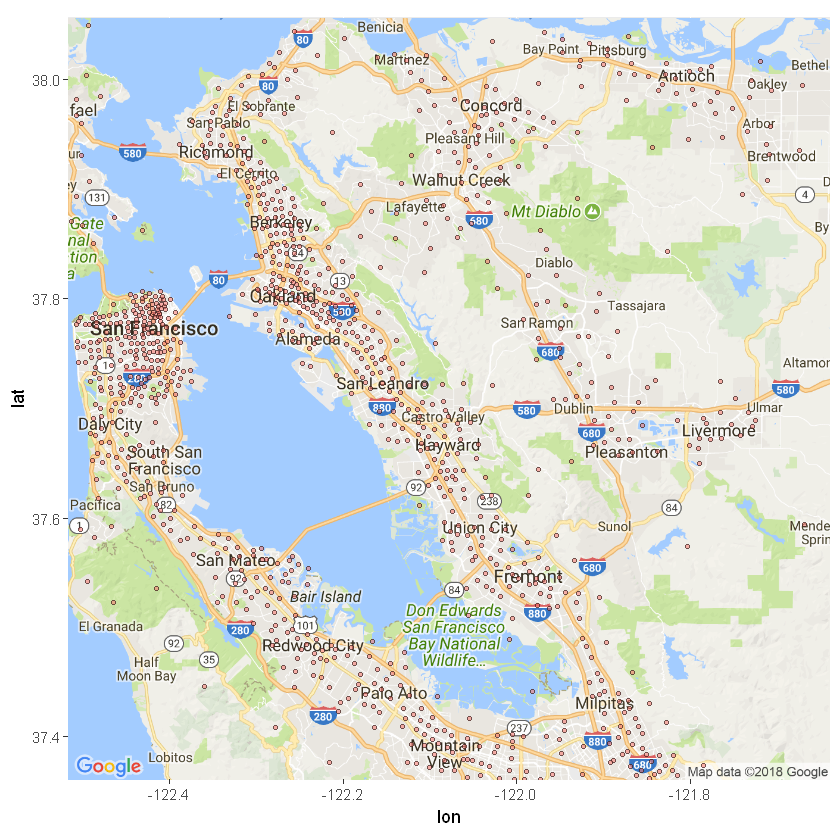

In [177]:
# loading the required packages
library(ggplot2)
library(ggmap)
#png(filename="Q10_map.png")
# creating a sample data.frame with your lat/lon points
lon <- longitude
lat <- latitude
df <- as.data.frame(cbind(lon,lat))

# getting the map
mapgilbert <- get_map(location = c(lon = mean(df$lon), lat = mean(df$lat)), zoom = "auto",
                      maptype = "roadmap", scale = "auto")

# plotting the map with some points on it
ggmap(mapgilbert) +
  geom_point(data = df, aes(x = lon, y = lat, fill = "blue", alpha = 0.8), size = 1, shape = 21) +
  guides(fill=FALSE, alpha=FALSE, size=FALSE)
#lines(l, col="Green")

#dev.off()

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=37.709992,-122.077918&zoom=10&size=640x640&scale=2&maptype=roadmap&language=en-EN&sensor=false
Warning message:
"Removed 838 rows containing missing values (geom_point)."

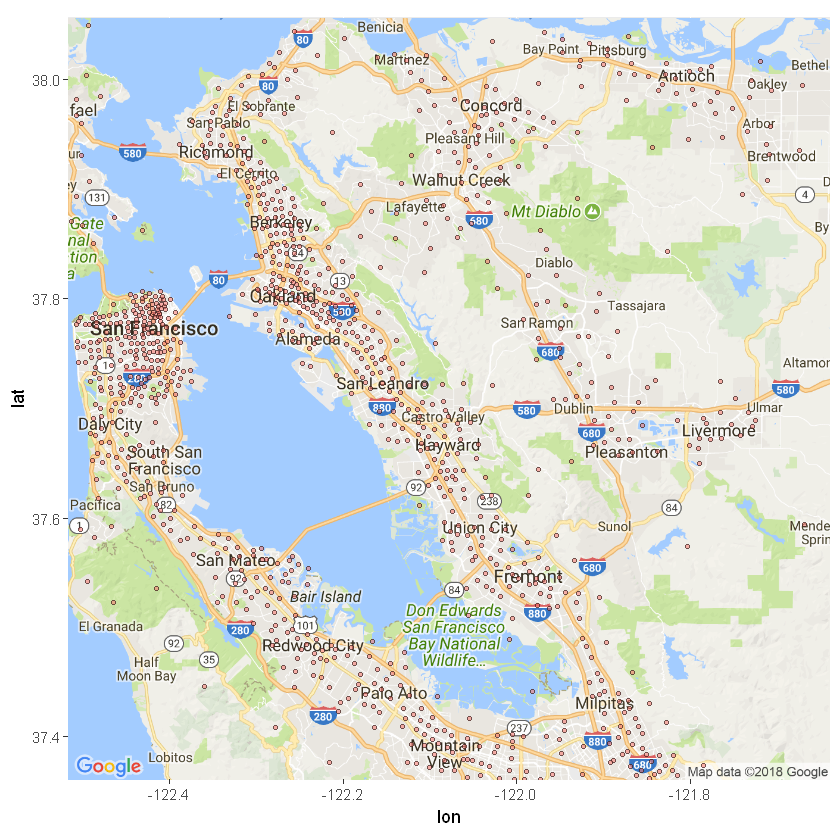

In [133]:
# loading the required packages
library(ggplot2)
library(ggmap)
png("map.png")
# creating a sample data.frame with your lat/lon points
lon <- longitude
lat <- latitude
df <- as.data.frame(cbind(lon,lat))

# getting the map
mapgilbert <- get_map(location = c(lon = mean(df$lon), lat = mean(df$lat)), zoom = "auto",
                      maptype = "roadmap", scale = "auto")

# plotting the map with some points on it
ggmap(mapgilbert) +
  geom_point(data = df, aes(x = lon, y = lat, fill = "blue", alpha = 0.8), size = 1, shape = 21) +
  guides(fill=FALSE, alpha=FALSE, size=FALSE) # +geom_path(color="Green")


In [178]:
head(jsonFile)

V1,V2,V3,V4
1,"Sargent Creek, San Ardo",-120.7887,36.07163
2,"400 Northumberland Avenue, Redwood Oaks, Redwood City",-122.2194,37.46958
3,"18300 Sutter Boulevard, Morgan Hill",-121.6602,37.15048
4,"2700 Stoughton Way, Sheffield, Sacramento",-121.3428,38.57307
5,"3200 Huntsman Drive, Rosemont Park, Sacramento",-121.3617,38.55443
6,"100 Carlsbad Circle, Vacaville",-121.9484,38.36665


In [181]:
for( i in 1:10){
  print(jsonFile[which(jsonFile$V1==v1[i]),]$V2)
}

[1] 3300 Brodie Drive, South San Jose, San Jose
2704 Levels: 0 12th East Street, Pittsburg ...
[1] 4300 La Torre Avenue, South San Jose, San Jose
2704 Levels: 0 12th East Street, Pittsburg ...
[1] 4500 Thornhaven Way, Edenvale, San Jose
2704 Levels: 0 12th East Street, Pittsburg ...
[1] 100 Carling Court, South San Jose, San Jose
2704 Levels: 0 12th East Street, Pittsburg ...
[1] 200 Azucar Avenue, Edenvale, San Jose
2704 Levels: 0 12th East Street, Pittsburg ...
[1] 400 Piercy Road, Edenvale, San Jose
2704 Levels: 0 12th East Street, Pittsburg ...
[1] 5900 Southview Drive, Edenvale, San Jose
2704 Levels: 0 12th East Street, Pittsburg ...
[1] Mimosa Way, South San Jose, San Jose
2704 Levels: 0 12th East Street, Pittsburg ...
[1] 7100 VÃ­a Romera, South San Jose, San Jose
2704 Levels: 0 12th East Street, Pittsburg ...
[1] 100 Cheltenham Way, South San Jose, San Jose
2704 Levels: 0 12th East Street, Pittsburg ...
